In [1]:
import numpy as np

import csv
from scipy import stats
import pandas as pd
import seaborn as sns


import matplotlib.pyplot as plt
import matplotlib



In [2]:
df = pd.read_excel(r"C:\Users\eart0477\1. Work files\1. Postdoc work\south africa\Data from B Sherwood Lollar\ruta_sa.xlsx", header=0, index_col=0, sheet_name=2)


In [3]:
# wits papers list
witslist1 = ['Onstott et al., 2006', 'Heard et al., 2018', 'Ward et al., 2004', 'Sherwood Lollar et al., 2006', 'Simkus et al., 2016']



#select my data into a differen frame
mf = df.query('Reference == "This study"')

#drop nans
df1 = df.dropna(axis = 0, subset=['Reference', 'd2H_C1', 'd13C_C1'])
#remove my data from the other data frame
df2 = df1[df1['Reference'].isin(witslist1)]


In [4]:
colours = {'Simkus et al., 2016':'lightsteelblue', 'Sherwood Lollar et al., 2006':'silver', 'Ward et al., 2004':'grey', 'Heard et al., 2018':'blue'}


In [34]:
#make mixing lines
#microbial end-member
d13C_m = -58
d2H_m = -175
C1_m = 90
Cn_m = 0.005

#abiotic end-member
d13C_a = -28
d2H_a = -366

C1_a = 40
Cn_a = 7

d13C_model = []
d2H_model = []
C1_model = []
Cn_model = []
fn = []

for f in np.linspace(0, 1, 100):
    d13Cmod = d13C_m * f + d13C_a * (1-f)
    d2Hmod = d2H_m * f + d2H_a * (1-f)
    C1mod = C1_m * f + C1_a * (1-f)
    Cnmod = Cn_m * f + Cn_a * (1-f)
    d13C_model.append(d13Cmod)
    d2H_model.append(d2Hmod)
    C1_model.append(C1mod)
    Cn_model.append(Cnmod)
    fn.append(f)

C1Cn_model = np.array(C1_model)/np.array(Cn_model)

1.066666666666667 0.7068062827225124 0.39181807888372316


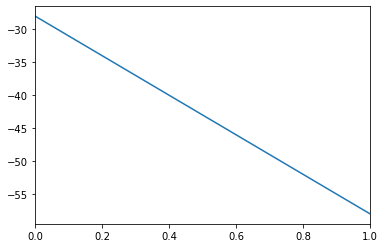

In [35]:
plt.plot(fn, d13C_model)
plt.xlim(0,1)
# lienar regression of d13C vs fraction of microbial end-member
model = np.polyfit(fn, d13C_model, 1)
model1 = np.polyfit(fn, d2H_model, 1)
model2 = np.polyfit(fn, C1Cn_model, 1)
#print(model, model1, model2)

# y  = a * x + b
# x = (y - b) / a

fr_mic_d13C = (-60 - model[1])/model[0]
fr_mic_d2H = (-231 - model1[1])/model1[0]
fr_mic_C1Cn = (98 - model2[1])/model2[0]


print(fr_mic_d13C,fr_mic_d2H,fr_mic_C1Cn)

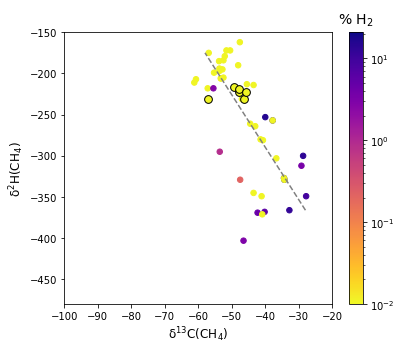

In [38]:
import copy
#fig, ax = plt.subplots()
my_cmap = copy.copy(matplotlib.cm.get_cmap('plasma_r')) # copy the default cmap
my_cmap.set_bad((0.94,0.96,0.14))

fig, ax = plt.subplots(figsize=(6,5))
s = plt.scatter(df2['d13C_C1'], df2['d2H_C1'], marker="o", c=df2['H2'] ,
                cmap=my_cmap, s=30, norm=matplotlib.colors.LogNorm())

plt.scatter(mf['d13C_C1'], mf['d2H_C1'], marker="o", color=(0.94,0.96,0.14), s=60, edgecolors='black')
plt.plot(d13C_model, d2H_model, color='grey', linestyle='dashed')

#c=df2['Reference'].map(colours)
#plt.colorbar(ax=ax ,cmap='bwr')
#colour map
#matplotlib.colors.LogNorm(1, 100)

plt.colorbar(s)
    
plt.ylabel('\u03B4$^{2}$H(CH$_4$)', fontsize=12)
plt.xlabel('\u03B4$^{13}$C(CH$_4$)', fontsize=12)
plt.xlim(-100, -20)
plt.ylim(-480,-150)


#Legend is labeled manually to label data by colour
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='% H$_2$', markerfacecolor='w', markersize=9)]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.2,1.12), frameon=False, fontsize=14)
plt.savefig('sach4222_may.eps')

In [30]:
#select my data into a differen frame
mf = df1.query('Reference == "This study"')

#drop nans
df1 = df.dropna(axis = 0, subset=['Reference', 'C1/Cn', 'd13C_C1'])
#remove my data from the other data frame
df2 = df2[df2['Reference'].isin(witslist1)]




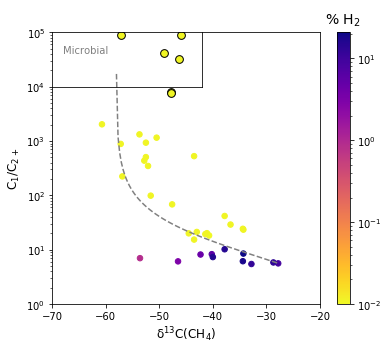

In [37]:
fig, ax = plt.subplots(figsize=(6,5))
s1 = plt.scatter(df2['d13C_C1'], df2['C1/Cn'], marker="o", c=df2['H2'] ,
                cmap=my_cmap, s=30, norm=matplotlib.colors.LogNorm())
plt.scatter(mf['d13C_C1'], mf['C1/Cn'], marker="o", color=(0.94,0.96,0.14), s=60, edgecolors='black')
plt.colorbar(s1)

#add mixing line
plt.plot(d13C_model, C1Cn_model, color='grey', linestyle = 'dashed')

#make box for microbial. actual box s=limit should be -58 on x axis based on etiope and lollar 2013
plt.plot(([-70, -42]), ([1e4, 1e4]), linestyle='solid', color='black', linewidth=0.8)
plt.plot(([-42, -42]), ([1e4, 1e5]), linestyle='solid', color='black', linewidth=0.8)
plt.text(-68, 4e4, 'Microbial', alpha=0.5)

#labels and formatting
plt.ylabel('C$_1$/C$_2$$_+$', fontsize=12)
plt.xlabel('\u03B4$^{13}$C(CH$_4$)', fontsize=12)
plt.yscale('log')
plt.xlim(-70, -20)
plt.ylim(1,1e5)
legend_elements = [Line2D([0], [0], marker='o', color='w', label='% H$_2$', markerfacecolor='w', markersize=9)]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.2,1.12), frameon=False, fontsize=14)
plt.savefig('c1cn222_may.png', dpi=300)


In [67]:
#select my data into a differen frame N2He ratios
mf = df.query('Reference == "This study"')
mf1 = mf.dropna(axis = 0, subset=['Reference', 'He', 'N2', 'H2', 'H2/He'])
#drop nans
df1 = df.dropna(axis = 0, subset=['Reference', 'He', 'N2', 'H2', 'H2/He' ])
#remove my data from the other data frame
df2 = df1[df1['Reference'] != 'This study']
df2 = df2[df2['Reference'] != 'Moore et al., 2018']
df2 = df2[df2['Reference'] != 'Hunt et al., 1996']
df2 = df2[df2['Reference'] != 'Pitkänen and Partamies, 2007']


#select moore
#kf = df1.query('Reference == "Moore et al., 2018"')
#kf1 = kf.dropna(axis = 0, subset=['Reference'])

#select eymold
#zf = df1.query('Reference == "Hunt et al., 1996"')
#zf1 = zf.dropna(axis = 0, subset=['Reference'])

#thermo = pd.concat([kf1, zf1])

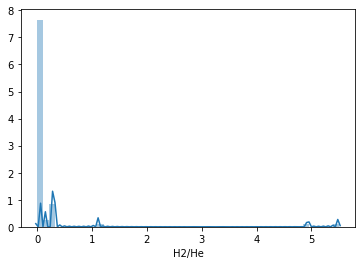

In [71]:
ddf = df.query('Reference == "Kietavainen et al., 2017"')

sns.distplot(ddf['H2/He'])

In [58]:
kkf = pd.read_excel(r"C:\Users\eart0477\1. Work files\1. Postdoc work\south africa\Data from B Sherwood Lollar\ruta_sa.xlsx", header=0, index_col=0, sheet_name='Sheet2')
h2_n = kkf['H2_n']
ch4_n = kkf['CH4_n']

In [53]:
a = h2ch4()
print(a)

None


Text(2000.0, 1500.0, '% H$_2$')

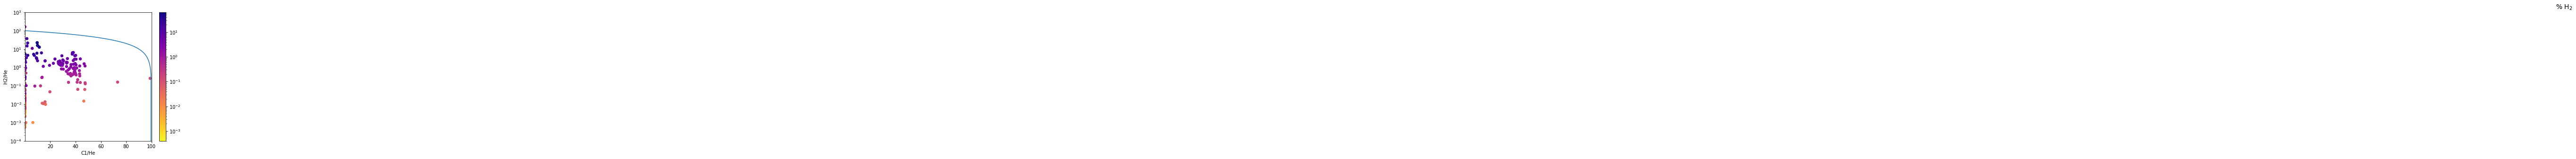

In [59]:
x = 'C1/He'
y = 'H2/He'




fig, ax = plt.subplots(figsize=(6,5))
s1 = plt.scatter(df2[x],df2[y], marker="o" ,   c=df2['H2'] ,cmap=my_cmap, s=30, norm=matplotlib.colors.LogNorm() )
s2 = plt.plot(ch4_n, h2_n)
#s2 = plt.scatter(thermo[x], thermo[y], marker="D" , color='limegreen' ,  s=60)
plt.colorbar(s1)
plt.scatter(mf1[x], mf1[y], marker="o", color=(0.94,0.96,0.14), s=60, edgecolors='black')
#plt.scatter(78, 78/5.24e-6, marker="v", color='blue', s=80, edgecolors='black')

k = np.linspace(0, 1e3, 1000)

#plt.plot(k, k*100, linestyle='-')
plt.yscale('log')
#plt.xscale('log')
plt.ylim(1e-4, 1e3)
plt.xlim(0.01, 100)
ax.set_ylabel(y)
ax.set_xlabel(x)
plt.text(2e3, 1.5e3, '% H$_2$', alpha=1, fontsize=14)
#legend_elements = [Line2D([0], [0], marker='o', color='w', label='Fracture fluids', markerfacecolor=(0.94,0.96,0.14) , markersize=9),
#Line2D([0], [0], marker='D', color='w', label='Thermogenic gas', markerfacecolor='limegreen', markersize=9)]
#plt.legend(handles=legend_elements, bbox_to_anchor=(0.52,0.2), frameon=True, fontsize=10)
#plt.savefig('heN2C1.png')


ValueError: 'c' argument must be a mpl color, a sequence of mpl colors or a sequence of numbers, not [(0.9677975592919913, 0.44127456009157356, 0.5358103155058701)
 (0.9677975592919913, 0.44127456009157356, 0.5358103155058701)
 (0.9677975592919913, 0.44127456009157356, 0.5358103155058701)
 (0.9677975592919913, 0.44127456009157356, 0.5358103155058701)
 (0.9677975592919913, 0.44127456009157356, 0.5358103155058701)
 (0.9677975592919913, 0.44127456009157356, 0.5358103155058701)
 (0.9677975592919913, 0.44127456009157356, 0.5358103155058701)
 (0.9677975592919913, 0.44127456009157356, 0.5358103155058701)
 (0.9677975592919913, 0.44127456009157356, 0.5358103155058701)
 (0.9677975592919913, 0.44127456009157356, 0.5358103155058701)
 (0.9677975592919913, 0.44127456009157356, 0.5358103155058701)
 (0.9677975592919913, 0.44127456009157356, 0.5358103155058701)
 (0.9677975592919913, 0.44127456009157356, 0.5358103155058701)
 (0.9709475908389634, 0.46403989737619705, 0.23268163300341138)
 (0.9709475908389634, 0.46403989737619705, 0.23268163300341138)
 (0.9709475908389634, 0.46403989737619705, 0.23268163300341138)
 (0.9709475908389634, 0.46403989737619705, 0.23268163300341138)
 (0.9709475908389634, 0.46403989737619705, 0.23268163300341138)
 (0.9709475908389634, 0.46403989737619705, 0.23268163300341138)
 (0.9709475908389634, 0.46403989737619705, 0.23268163300341138)
 (0.9709475908389634, 0.46403989737619705, 0.23268163300341138)
 (0.9709475908389634, 0.46403989737619705, 0.23268163300341138)
 (0.9709475908389634, 0.46403989737619705, 0.23268163300341138)
 (0.9709475908389634, 0.46403989737619705, 0.23268163300341138)
 (0.9709475908389634, 0.46403989737619705, 0.23268163300341138)
 (0.9709475908389634, 0.46403989737619705, 0.23268163300341138)
 (0.9709475908389634, 0.46403989737619705, 0.23268163300341138)
 (0.9709475908389634, 0.46403989737619705, 0.23268163300341138)
 (0.9709475908389634, 0.46403989737619705, 0.23268163300341138)
 (0.9709475908389634, 0.46403989737619705, 0.23268163300341138)
 (0.9709475908389634, 0.46403989737619705, 0.23268163300341138)
 (0.8233753136307219, 0.5564097629441267, 0.19515040910202758)
 (0.8233753136307219, 0.5564097629441267, 0.19515040910202758)
 (0.8233753136307219, 0.5564097629441267, 0.19515040910202758)
 (0.8233753136307219, 0.5564097629441267, 0.19515040910202758)
 (0.8233753136307219, 0.5564097629441267, 0.19515040910202758)
 (0.8233753136307219, 0.5564097629441267, 0.19515040910202758)
 (0.8233753136307219, 0.5564097629441267, 0.19515040910202758)
 (0.8233753136307219, 0.5564097629441267, 0.19515040910202758)
 (0.8233753136307219, 0.5564097629441267, 0.19515040910202758)
 (0.8233753136307219, 0.5564097629441267, 0.19515040910202758)
 (0.8233753136307219, 0.5564097629441267, 0.19515040910202758)
 (0.8233753136307219, 0.5564097629441267, 0.19515040910202758)
 (0.8233753136307219, 0.5564097629441267, 0.19515040910202758)
 (0.8233753136307219, 0.5564097629441267, 0.19515040910202758)
 (0.8233753136307219, 0.5564097629441267, 0.19515040910202758)
 (0.8233753136307219, 0.5564097629441267, 0.19515040910202758)
 (0.8233753136307219, 0.5564097629441267, 0.19515040910202758)
 (0.8233753136307219, 0.5564097629441267, 0.19515040910202758)
 (0.8233753136307219, 0.5564097629441267, 0.19515040910202758)
 (0.8233753136307219, 0.5564097629441267, 0.19515040910202758)
 (0.8233753136307219, 0.5564097629441267, 0.19515040910202758)
 (0.8233753136307219, 0.5564097629441267, 0.19515040910202758)
 (0.8233753136307219, 0.5564097629441267, 0.19515040910202758)
 (0.8233753136307219, 0.5564097629441267, 0.19515040910202758)
 (0.8233753136307219, 0.5564097629441267, 0.19515040910202758)
 (0.8233753136307219, 0.5564097629441267, 0.19515040910202758)
 (0.7188721694437208, 0.601448945129206, 0.19432336924941168)
 (0.7188721694437208, 0.601448945129206, 0.19432336924941168)
 (0.7188721694437208, 0.601448945129206, 0.19432336924941168)
 (0.7188721694437208, 0.601448945129206, 0.19432336924941168)
 (0.7188721694437208, 0.601448945129206, 0.19432336924941168)
 (0.6199256505009382, 0.6340974041174863, 0.19366913066077465)
 (0.6199256505009382, 0.6340974041174863, 0.19366913066077465)
 (0.6199256505009382, 0.6340974041174863, 0.19366913066077465)
 (0.6199256505009382, 0.6340974041174863, 0.19366913066077465)
 (0.6199256505009382, 0.6340974041174863, 0.19366913066077465)
 (0.6199256505009382, 0.6340974041174863, 0.19366913066077465)
 (0.48656894593750394, 0.6663726666050075, 0.19297564161091252)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.19381360556293972, 0.7009873870290324, 0.2710533164704233)
 (0.48656894593750394, 0.6663726666050075, 0.19297564161091252)
 (0.6199256505009382, 0.6340974041174863, 0.19366913066077465)
 (0.6199256505009382, 0.6340974041174863, 0.19366913066077465)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193)
 (0.20260140137245986, 0.6888777365691905, 0.5073931192355193) None None
 None None (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678) None None
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678) None None
 None (0.21283940026780146, 0.6736342952276683, 0.6790583455137678) None
 None None None
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678) None None
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678) None
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678) None
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678) None None
 None None None None None None None
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678) None
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678) None None
 None None None None None None None None
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678) None None
 None (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678) None
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678) None
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678) None None
 None None None
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678) None
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678) None None
 None None None None None None None None
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678)
 (0.21283940026780146, 0.6736342952276683, 0.6790583455137678) None None
 None None None None
 (0.964715581208501, 0.4175934015417711, 0.6999430436310112)
 (0.964715581208501, 0.4175934015417711, 0.6999430436310112)
 (0.964715581208501, 0.4175934015417711, 0.6999430436310112)
 (0.964715581208501, 0.4175934015417711, 0.6999430436310112)
 (0.964715581208501, 0.4175934015417711, 0.6999430436310112)
 (0.964715581208501, 0.4175934015417711, 0.6999430436310112)
 (0.964715581208501, 0.4175934015417711, 0.6999430436310112)
 (0.964715581208501, 0.4175934015417711, 0.6999430436310112)
 (0.964715581208501, 0.4175934015417711, 0.6999430436310112)
 (0.964715581208501, 0.4175934015417711, 0.6999430436310112)
 (0.964715581208501, 0.4175934015417711, 0.6999430436310112)
 (0.964715581208501, 0.4175934015417711, 0.6999430436310112)
 (0.964715581208501, 0.4175934015417711, 0.6999430436310112)
 (0.964715581208501, 0.4175934015417711, 0.6999430436310112)
 (0.964715581208501, 0.4175934015417711, 0.6999430436310112)
 (0.964715581208501, 0.4175934015417711, 0.6999430436310112)
 (0.964715581208501, 0.4175934015417711, 0.6999430436310112)
 (0.964715581208501, 0.4175934015417711, 0.6999430436310112)
 (0.964715581208501, 0.4175934015417711, 0.6999430436310112)
 (0.964715581208501, 0.4175934015417711, 0.6999430436310112)].

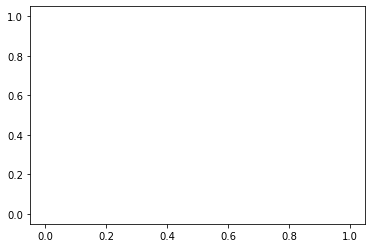

In [14]:
sns.scatterplot(df2['He'],df2['H2'], hue=df2['Reference'] )
sns.scatterplot(mf['He'], mf['H2'], hue=mf['Reference'], marker='^')

In [11]:
#select my data into a differen frame N2He ratios
mf = df.query('Reference == "This study"')
mf1 = mf.dropna(axis = 0, subset=['Reference', 'He/N2'  ])
#drop nans
df2 = df.dropna(axis = 0, subset=['Reference',  'He/N2' ])
#remove my data from the other data frame
witslist = ['This study', 'Onstott et al., 2006', 'Heard et al., 2018', 'Ward et al., 2004', 'Sherwood Lollar et al., 2006', 'Simkus et al., 2016']

df2 = df2[df2['Reference'].isin(witslist)]

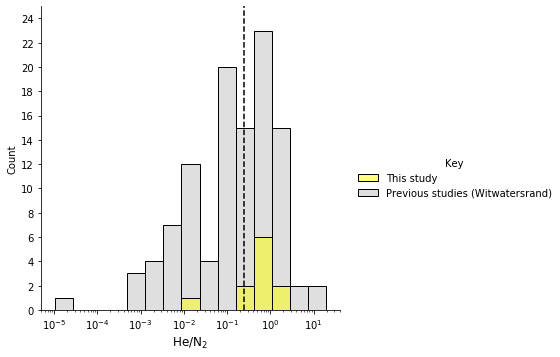

In [38]:

ax = sns.displot(data=df2, x='He/N2', kind='hist', log_scale = True, hue='Key', bins=15, palette=['yellow', 'silver'])
plt.axvline(0.239, linestyle='--', color='black' )

plt.xlabel('He/N$_2$', fontsize=12)
plt.ylim(0,25)
plt.yticks([0,2,4,6,8,10,12,14,16,18,20,22,24])
plt.savefig('distplotn33.png', dpi=300)





In [93]:
np.median(df2['He/N2'])

0.23966483642187142

In [35]:
pip install seaborn --upgrade


  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1


In [41]:
import seaborn as sns

In [42]:
pip list


Package                       Version            
----------------------------- -------------------
affine                        2.3.0              
altair                        4.1.0              
anaconda-client               1.7.2              
anaconda-navigator            1.9.12             
appdirs                       1.4.3              
arviz                         0.10.0             
astor                         0.8.1              
attrs                         19.3.0             
backcall                      0.1.0              
backports.functools-lru-cache 1.6.1              
backports.tempfile            1.0                
backports.weakref             1.0.post1          
base58                        2.1.0              
basemap                       1.2.1              
beautifulsoup4                4.9.0              
bleach                        3.1.4              
blinker                       1.4                
branca                        0.4.0              


In [92]:
df2.head()

,Label_ID,Sample_ID,Alt_ID,Reference,He,d2H_H2,d2H_C1,d13C_C1,d2H_C2,d13C_C3,...,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47
Location,,,,,,,,,,,,,,,,,,,,,
Virginia,Burning Cross,1307 Burning Cross,BC 240807 GAS,This study,2.74937,NaN,-217.0,-49.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Virginia,Flame 1,2278 Flame 1,AVDF 240807 GAS,This study,0.119248,NaN,-231.0,-57.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Virginia,Retreat,(DW54403),NaN,This study,6.83083,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Virginia,Hanekom,2264 (Hanekom),2264 22|7|08,This study,15.2292,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Virginia,EX1,EX1 (Kotze),EX 240807 GAS,This study,1.24869,NaN,-223.0,-47.8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#select my data into a differen frame
mf = df.query('Reference == "This study"')

#drop nans
mf = mf.dropna(axis = 0, subset=['Reference', 'N2/H2_m', 'H2/He_m', 'N2/He'])
print(mf)


               Location           Sample_ID                  Alt_ID  \
Label_ID                                                              
Burning Cross  Virginia  1307 Burning Cross           BC 240807 GAS   
Flame 1        Virginia        2278 Flame 1         AVDF 240807 GAS   
Retreat        Virginia           (DW54403)                     NaN   
Hanekom        Virginia      2264 (Hanekom)           2264 22|7|08    
EX1            Virginia         EX1 (Kotze)           EX 240807 GAS   
ML1            Virginia          ML1 (1370)          ML1 240807 GAS   
ML1-08         Virginia          ML1 (1370)            1370 22|7|08   
SAP11          Virginia               SAP11        SAP 11 22|7|08     
ST23           Virginia                ST23        ST23 240807 GAS    
13W            Virginia                 NaN  SD FW07212008 13W GAS    
14W            Virginia                 NaN   SD GA07212008 14W GAS   

                Reference        He  d2H_H2  d2H_C1  d13C_C1  d2H_C2  d13C_C

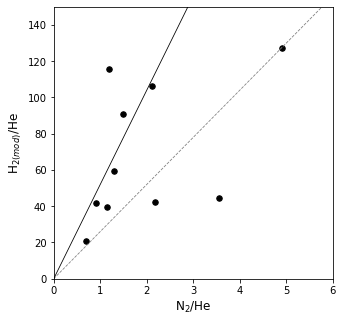

In [98]:


fig, ax = plt.subplots(figsize=(5,5))
s = plt.scatter(mf['N2/He'], mf['H2/He_m'], marker="o", s=30, color='black')
#plt.plot(([0, 1*10]), ([0, 16*10]), linestyle='dashed', color='grey', linewidth=0.8)
plt.plot(([0, 1*10]), ([0, 26*10]), linestyle='dashed', color='grey', linewidth=0.8)
plt.plot(([0, 1*10]), ([0, 52*10]), linestyle='solid', color='black', linewidth=0.8)


#c=df2['Reference'].map(colours)
#plt.colorbar(ax=ax ,cmap='bwr')
#colour map
#matplotlib.colors.LogNorm(1, 100)

    
plt.ylabel('H$_{2(mod)}$/He', fontsize=12)
plt.xlabel('N$_2$/He', fontsize=12)
plt.xlim(0, 6)
plt.ylim(0,150)


#Legend is labeled manually to label data by colour
#from matplotlib.lines import Line2D
#legend_elements = [Line2D([0], [0], marker='o', color='w', label='% H$_2$', markerfacecolor='w', markersize=9)]
#plt.legend(handles=legend_elements, bbox_to_anchor=(1.2,1.12), frameon=False, fontsize=14)
plt.savefig('h2he_n2he.eps')

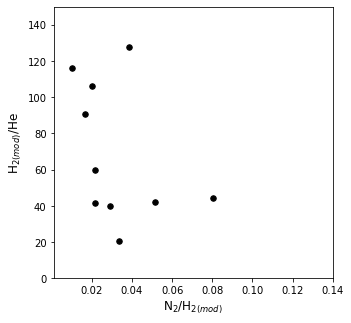

In [8]:


fig, ax = plt.subplots(figsize=(5,5))
s = plt.scatter(mf['N2/H2_m'], mf['H2/He_m'], marker="o", s=30, color='black')
#plt.plot(([0, 1*10]), ([0, 16*10]), linestyle='solid', color='black', linewidth=0.8)
#plt.plot(([0, 1*10]), ([0, 26*10]), linestyle='solid', color='black', linewidth=0.8)
#plt.plot(([0, 1*10]), ([0, 40*10]), linestyle='solid', color='red', linewidth=0.8)


#c=df2['Reference'].map(colours)
#plt.colorbar(ax=ax ,cmap='bwr')
#colour map
#matplotlib.colors.LogNorm(1, 100)

    
plt.ylabel('H$_{2(mod)}$/He', fontsize=12)
plt.xlabel('N$_2$/H$_{2(mod)}$', fontsize=12)
plt.xlim(0.001, 0.14)
plt.ylim(0,150)
#plt.xscale('log')


#Legend is labeled manually to label data by colour
#from matplotlib.lines import Line2D
#legend_elements = [Line2D([0], [0], marker='o', color='w', label='% H$_2$', markerfacecolor='w', markersize=9)]
#plt.legend(handles=legend_elements, bbox_to_anchor=(1.2,1.12), frameon=False, fontsize=14)
plt.savefig('h2hen2h2.eps')